In [24]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def FFT(signal):
    n=len(signal)
    if n==1:
        return signal
    else:
        om=np.exp(-2j * np.pi / n)
        even_part=signal[::2]
        odd_part=signal[1::2]
        even_fft=FFT(even_part)
        odd_fft=FFT(odd_part)
        out_signal=[0]*n
        for j in range(int(n>>1)):
            out_signal[j]=even_fft[j]+om**j*odd_fft[j]
            out_signal[j+int(n>>1)]=even_fft[j]-om**j*odd_fft[j]
        return out_signal

In [3]:
def __iFFT(signal):
    n=len(signal)
    if n==1:
        return signal
    else:
        om=np.exp(2j * np.pi /n )
        even_part=signal[::2]
        odd_part=signal[1::2]
        even_ifft=__iFFT(even_part)
        odd_ifft=__iFFT(odd_part)
        out_signal=[0]*n
        for j in range(int(n>>1)):
            out_signal[j]=(even_ifft[j]+om**j*odd_ifft[j])
            out_signal[j+int(n>>1)]=(even_ifft[j]-om**j*odd_ifft[j])
        return out_signal

In [4]:
def iFFT(signal):
    n=len(signal)
    out_signal=__iFFT(signal)
    out_signal[:] = [x / n for x in out_signal]
    return out_signal

In [20]:
P = (1, 2, 3, 4)
P2 = iFFT(FFT(P))
P3 = FFT(iFFT(P))
print(np.allclose(P, P2),np.allclose(P, P3))

True True


In [37]:
time=np.linspace(0,2*np.pi,512)
A, B, C, D = 1, 1, 3, 6
signal=A*np.cos(B*ns)+C*np.sin(D*ns)

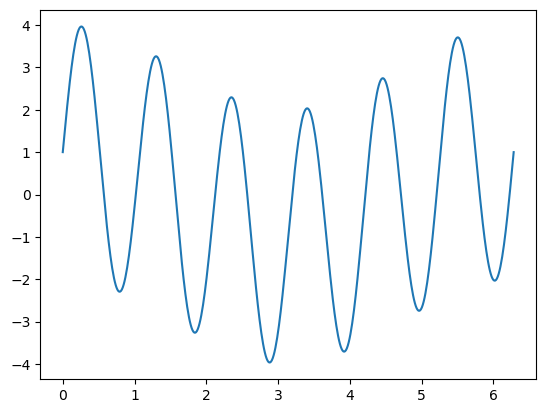

In [38]:
plt.plot(time,signal)

<StemContainer object of 3 artists>

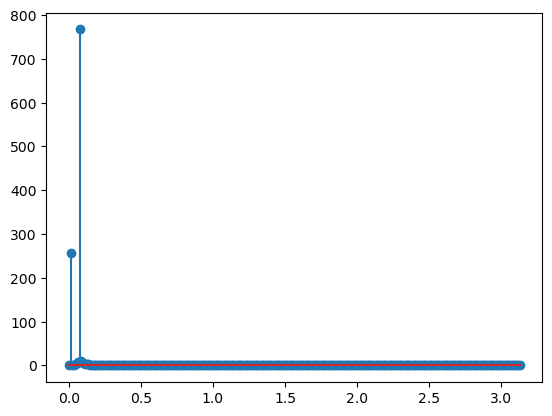

In [43]:
n=len(signal)
freqs=[0]*n
df=(time[-1]-time[0])/n
half_n=n//2
for i, I in enumerate(FFT(signal)):
    freqs[i]=i*df
plt.stem(freqs[:half_n],np.abs(FFT(signal)[:half_n]))